In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation


In [5]:
(X_train, Y_train), (X_test, Y_test)=imdb.load_data(path= "imdb.npz",
               num_words=None,
               skip_top=0,
               maxlen=None,
               seed=113,
               start_char=1,
               oov_char=2,
               index_from=3)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [7]:
print("Type: ", type(X_train))
print("Type: ", type(Y_train))

print("X train shape: ",X_train.shape)
print("Y train shape: ",Y_train.shape)

Type:  <class 'numpy.ndarray'>
Type:  <class 'numpy.ndarray'>
X train shape:  (25000,)
Y train shape:  (25000,)


Y train values:  [0 1]
Y test values:  [0 1]
Y train distribution:  {0: 12500, 1: 12500}
Y testdistribution:  {0: 12500, 1: 12500}
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/li

Train mean: 238.71364
Train median: 178.0
Train mode: ModeResult(mode=array([132]), count=array([196]))


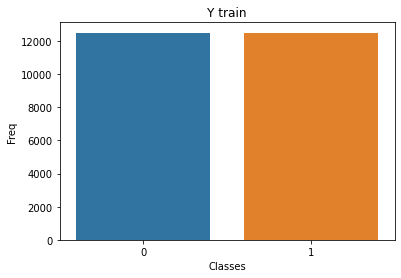

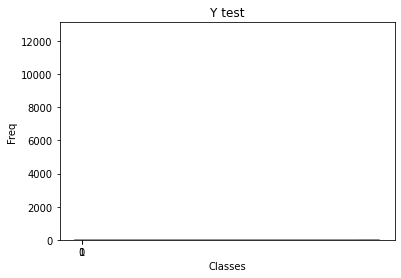

In [13]:
print("Y train values: ",np.unique(Y_train))
print("Y test values: ",np.unique(Y_test))

unique, counts = np.unique(Y_train, return_counts = True)
print("Y train distribution: ",dict(zip(unique,counts)))

unique, counts = np.unique(Y_test, return_counts = True)
print("Y testdistribution: ",dict(zip(unique,counts)))

plt.figure()
sns.countplot(Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")

plt.figure()
sns.countplot(Y_test)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y test")

d = X_train[0]
print(d)
print(len(d))

review_len_train = []
review_len_test = []
for i, ii in zip(X_train, X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(ii))

sns.distplot(review_len_train, hist_kws = {"alpha":0.3})
sns.distplot(review_len_test, hist_kws = {"alpha":0.3})

print("Train mean:", np.mean(review_len_train))
print("Train median:", np.median(review_len_train))
print("Train mode:", stats.mode(review_len_train))



In [14]:
word_index = imdb.get_word_index()
print(type(word_index))
print(len(word_index))

for keys, values in word_index.items():
    if values == 22:
        print(keys)

def whatItSay(index = 24):
    
    reverse_index = dict([(value, key) for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i - 3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

decoded_review = whatItSay(36)

1646592/1641221 [==============================] - 0s 0us/step
<class 'dict'>
88584
you
! sorry i just didn't find the subject matter as compelling as the filmmaker did the robot guy and the mole rat guy were pretty interesting although morris didn't really tell us much about them the other two subjects were a bore and the supposed connections between them didn't hold up
0


In [15]:
num_words = 15000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=num_words)

maxlen = 130
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

print(X_train[5])

for i in X_train[0:10]:
    print(len(i))

decoded_review = whatItSay(5)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]
130
130
130
130
130
130
130
130
130
130
! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentar

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 130, 32)           480000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
196/196 [==============================] - 10s 44ms/step - loss: 0.6682 - accuracy: 0.5847 - val_loss: 0.8891 - val_accuracy: 0.6364
Epoch 2/5
196/196 [==============================] - 8s 43ms/step - loss: 0.4389 - accuracy: 0.821

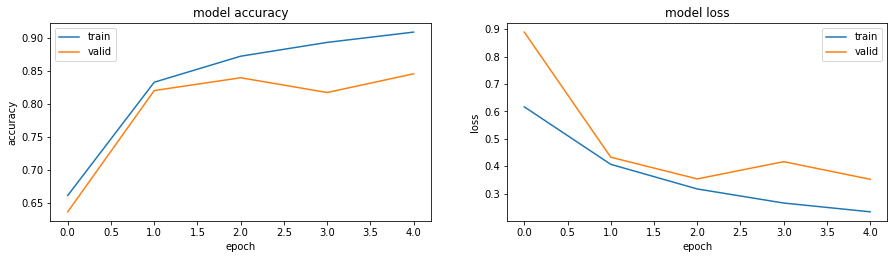

In [19]:

rnn = Sequential()
rnn.add(Embedding(num_words, 32, input_length = len(X_train[0])))
rnn.add(SimpleRNN(16, input_shape = (num_words,maxlen), return_sequences= False, activation= "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss = "binary_crossentropy", optimizer="rmsprop",metrics= ["accuracy"])

history = rnn.fit(X_train, Y_train, validation_data= (X_test, Y_test), epochs=5, batch_size= 128, verbose=1)

score = rnn.evaluate(X_test, Y_test)
print("Accuracy: %",score[1]*100)

history.history.keys()

plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history["accuracy"])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()